# Import dependies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import numpy as np
import seaborn as sns
import missingno as msno

# Import data

In [ ]:
df = pd.read_csv('water_level_2002_2016_Danube.csv')
df

,date,height,error
0,2002-07-06,72.938,0.040
1,2002-08-10,72.852,0.064
2,2002-09-14,73.013,0.018
3,2002-10-19,74.335,0.008
4,2002-11-23,75.696,0.011
...,...,...,...
112,2016-01-11,72.330,0.007
113,2016-02-15,73.189,0.011
114,2016-03-21,73.061,0.003
115,2016-04-25,73.164,0.022


In [ ]:
df['height'].max()

77.546

In [ ]:
#Converting date from object to datetime
df['date'] = pd.to_datetime(df['date'])
#df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

In [ ]:
df.index

RangeIndex(start=0, stop=117, step=1)

In [ ]:
df.shape

(117, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    117 non-null    datetime64[ns]
 1   height  117 non-null    float64       
 2   error   117 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.9 KB


In [ ]:
df.describe()

,height,error
count,117.000000,117.000000
mean,73.471376,0.027607
std,1.278990,0.039942
min,70.509000,0.001000
25%,72.627000,0.007000
50%,73.293000,0.017000
75%,74.043000,0.033000
max,77.546000,0.350000


In [ ]:
df.isnull().sum()

date      0
height    0
error     0
dtype: int64

In [ ]:
print("missing_data:", df.isna().sum())
print("unique dates:", df.index.nunique())

missing_data: date      0
height    0
error     0
dtype: int64
unique dates: 117


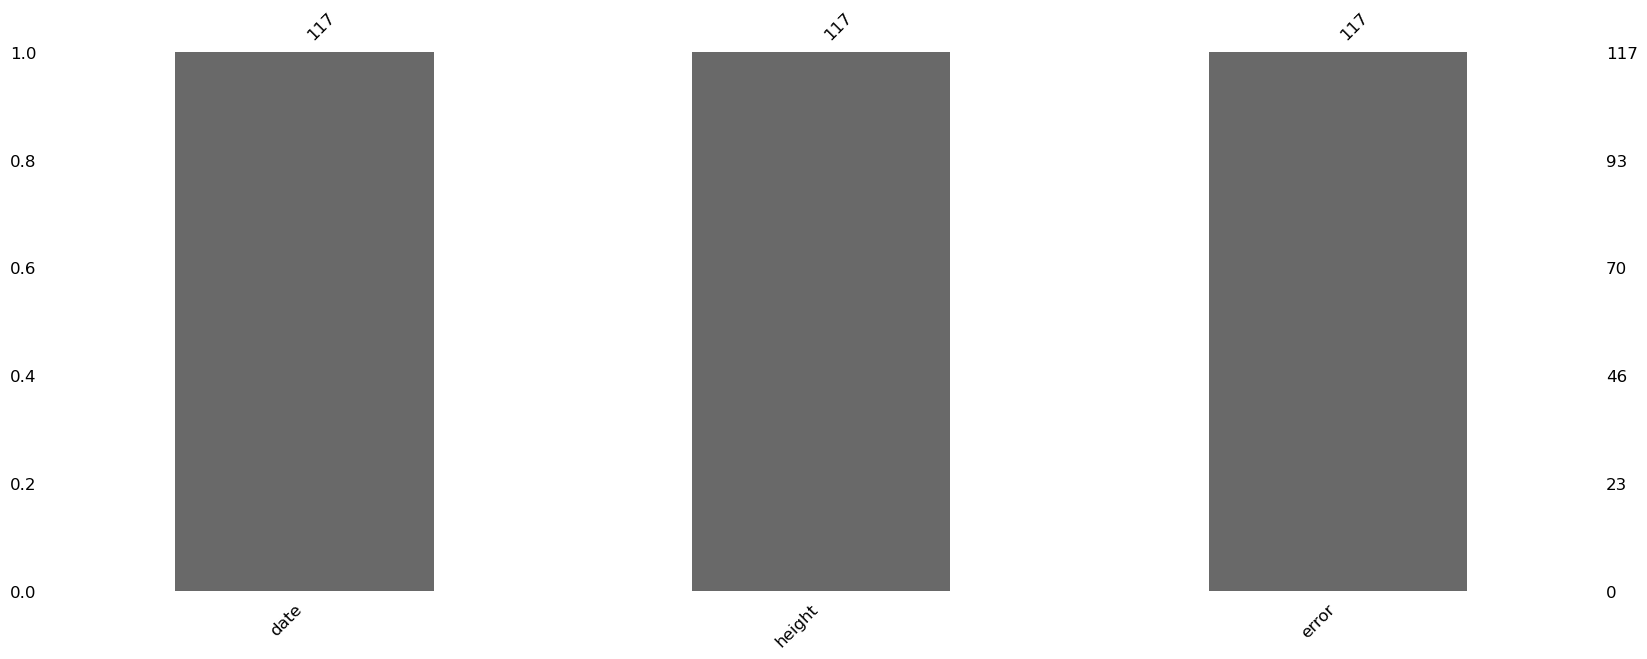

In [ ]:
msno.bar(df, figsize=(20, 7), fontsize=12);


In [ ]:
print("Start: ", df['date'].min())
print("End: ", df['date'].max())
#df.set_index('date', inplace = True)

Start:  2002-07-06 00:00:00
End:  2016-05-30 00:00:00


In [ ]:
duplicateRows = df[df.duplicated(keep = False)]
duplicateRows

,date,height,error


Observations:

1. We have monthly data for a period from 2002 to 2016
2. No null values
3. No duplicate dates


# EDA 

#### 1. Checking the distribution of features values


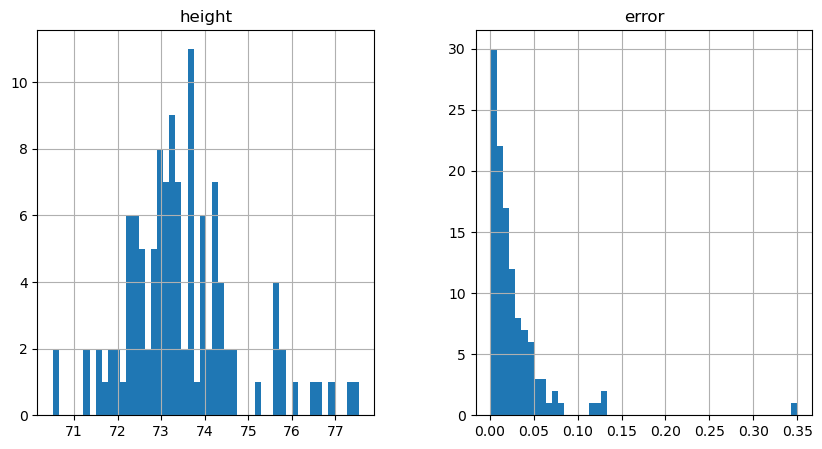

In [ ]:
df.set_index('date', inplace = True)
df.hist(bins=50, figsize=(10,5))
plt.show()

#### 2. Data visualization

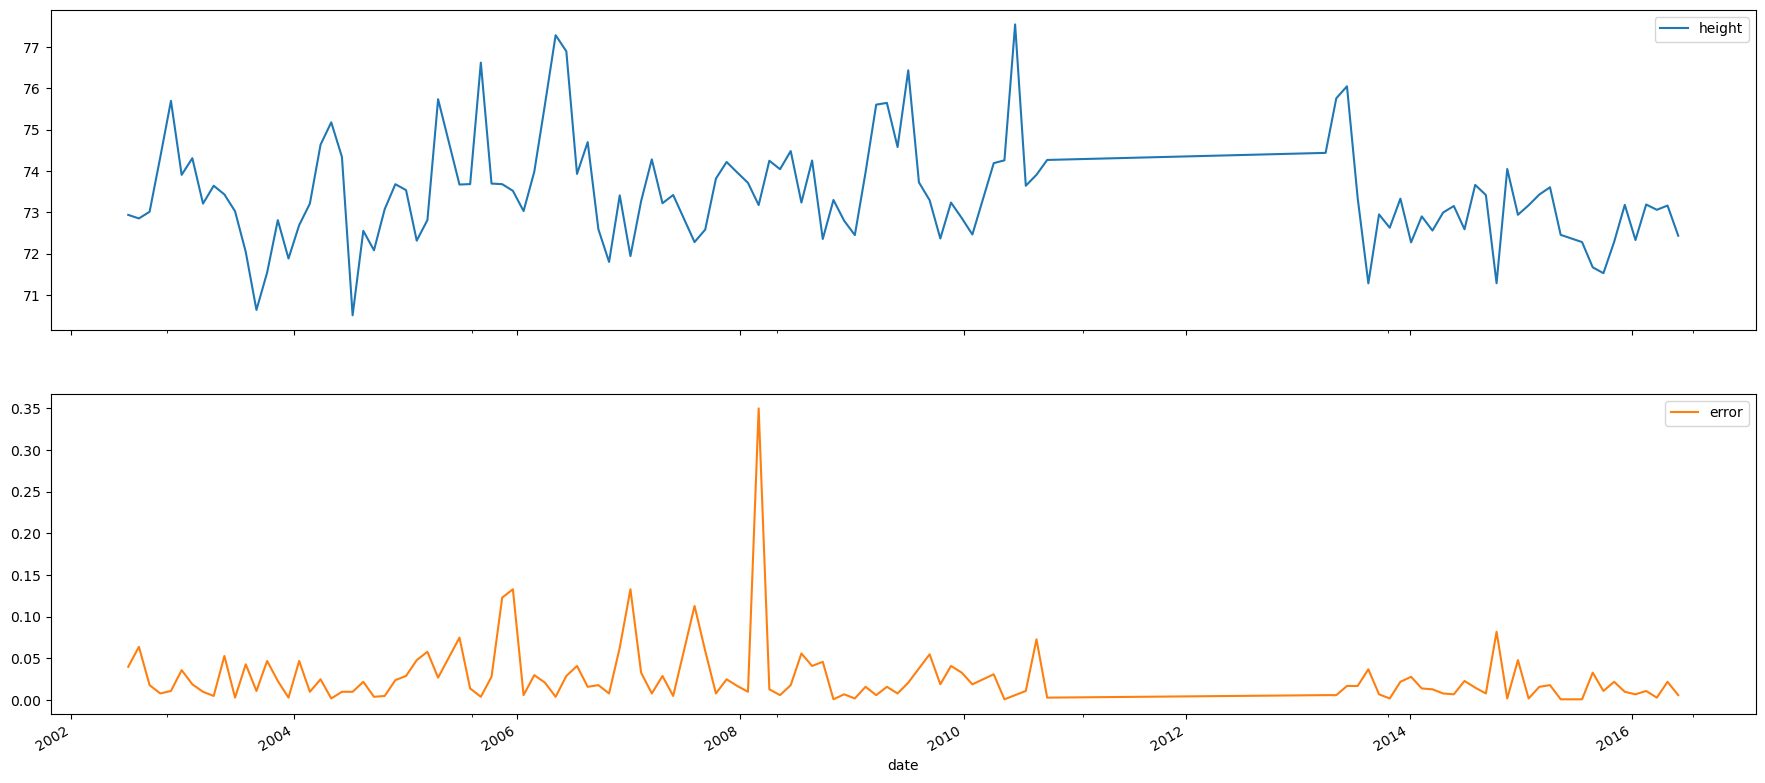

In [ ]:
df.plot(figsize = (22, 16), subplots=True, layout=(3,1),);


In [ ]:
df = df.reset_index()
df['Year'] = [i.year for i in df['date']]


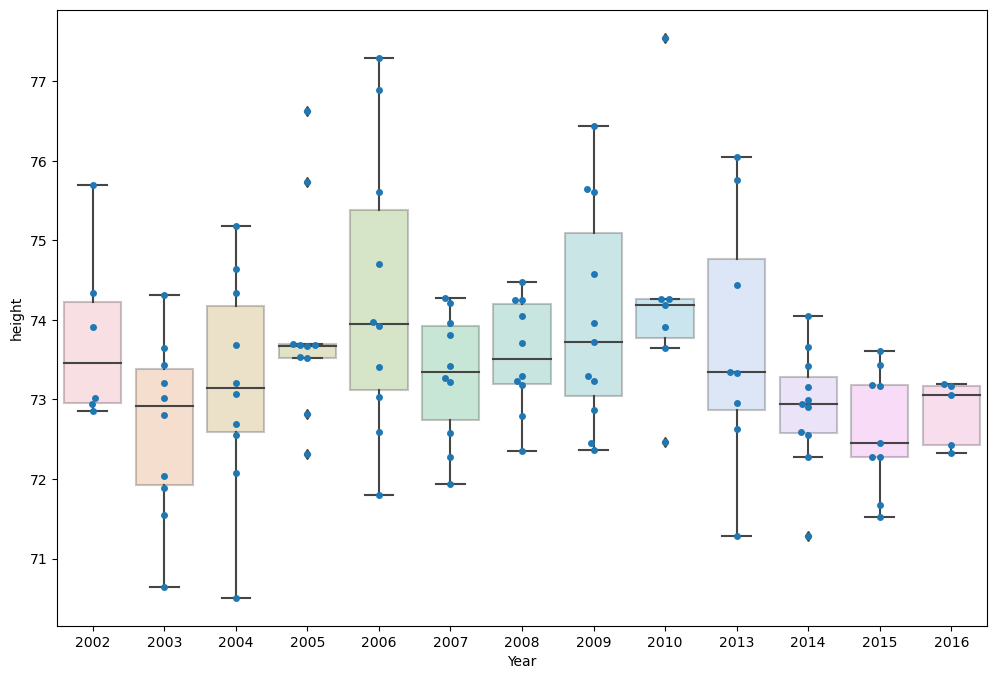

In [ ]:
#box plot to see distribution of height in each year
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(data=df, x=df.Year, y = 'height',  ax = ax, boxprops=dict(alpha=.3));
sns.swarmplot(data=df, x=df.Year, y = 'height');

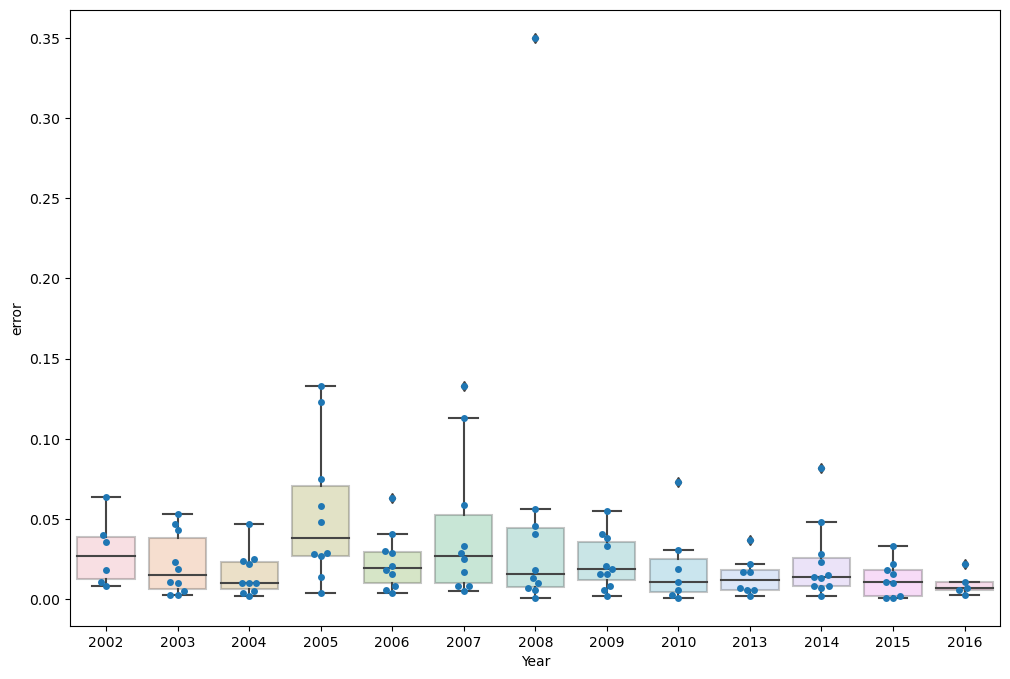

In [ ]:
#box plot to see distribution of error in each year
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(data=df, x=df.Year, y = 'error',  ax = ax, boxprops=dict(alpha=.3));
sns.swarmplot(data=df, x=df.Year, y = 'error');

Observations:

1. The height feature follows a normal distribution
2. The error feature is right skewed
3. The length of the bars in box plot for both height & error varies. 
4. Overall data seems to have some outliers for both height & error
5. The data is not continuous, there are missing dates (2011-2012)


In [ ]:
#Cheking the minimum values for height & error for each year
#Rule A means year 
df.set_index('date', inplace = True)
df = df.drop('Year', axis=1)
df.resample(rule='A').min()

,height,error
date,,
2002-12-31,72.852,0.008
2003-12-31,70.639,0.003
2004-12-31,70.509,0.002
2005-12-31,72.315,0.004
2006-12-31,71.800,0.004
2007-12-31,71.941,0.005
2008-12-31,72.355,0.001
2009-12-31,72.367,0.002
2010-12-31,72.464,0.001


In [ ]:
#Cheking the maximum values for height & error for each year
df.resample(rule='Y').max()

,height,error
date,,
2002-12-31,75.696,0.064
2003-12-31,74.309,0.053
2004-12-31,75.177,0.047
2005-12-31,76.621,0.133
2006-12-31,77.285,0.063
2007-12-31,74.281,0.133
2008-12-31,74.482,0.350
2009-12-31,76.435,0.055
2010-12-31,77.546,0.073


<AxesSubplot: xlabel='date'>

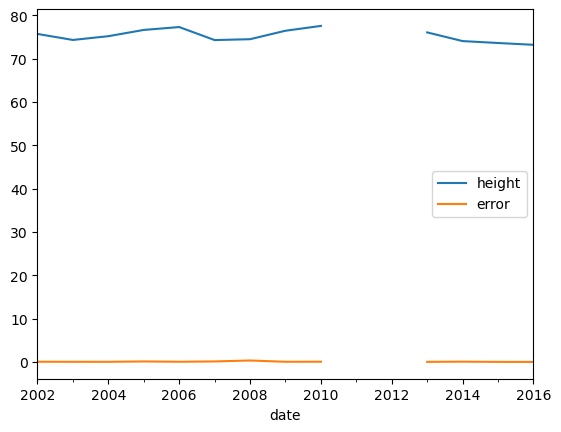

In [ ]:
#plot the maximum values for height & error for each year
df.resample(rule='Y').max().plot()

<AxesSubplot: xlabel='date'>

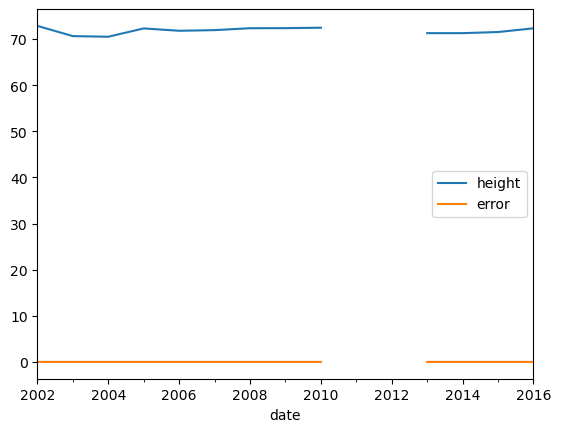

In [ ]:
#plot the minimun values for height & error for each year
df.resample(rule='Y').min().plot()


<AxesSubplot: xlabel='date'>

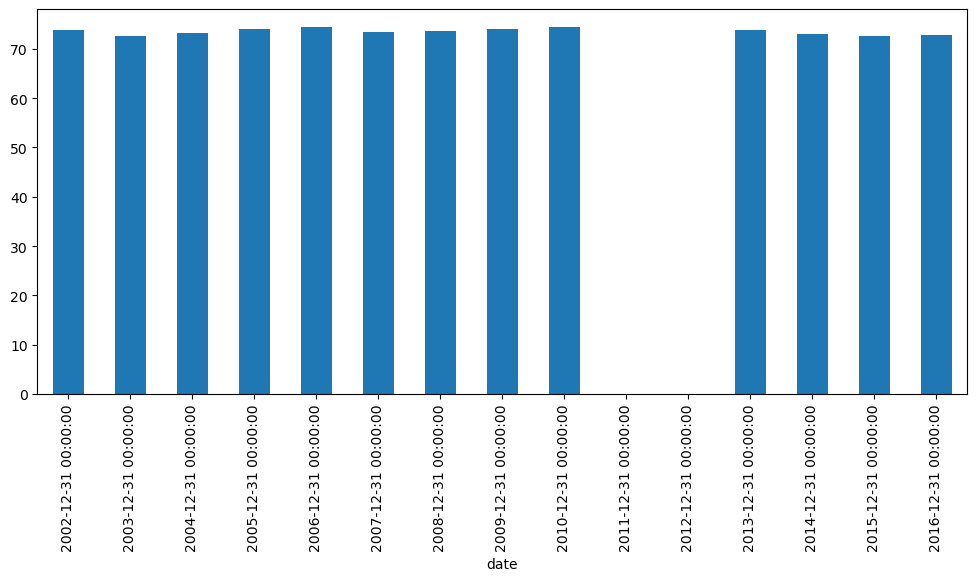

In [ ]:
#plot mean values of height for each year
df['height'].resample(rule='Y').mean().plot(kind='bar',figsize=(12,5))

<AxesSubplot: xlabel='date'>

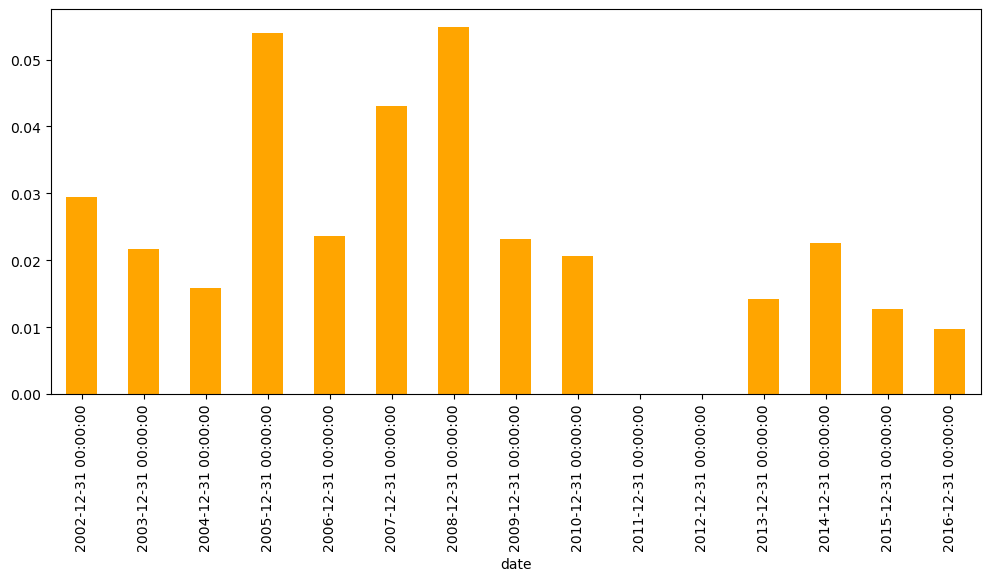

In [ ]:
#plot mean values of error for each year
df['error'].resample(rule='Y').mean().plot(kind='bar',color = 'orange',figsize=(12,5))

#### 3. Outliers Detection 

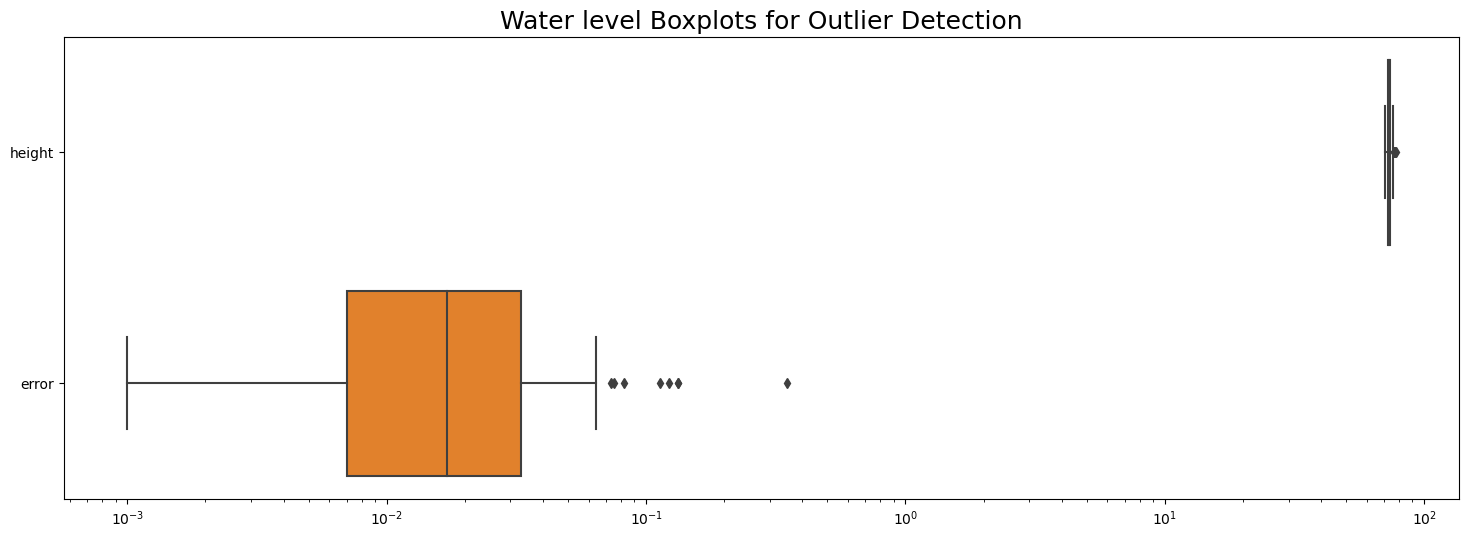

In [ ]:
plt.figure(figsize = (18,6))
ax =sns.boxplot(data = df, orient="h")
ax.set_title('Water level Boxplots for Outlier Detection', fontsize = 18)
ax.set(xscale="log")
plt.show()
     

<AxesSubplot: xlabel='height'>

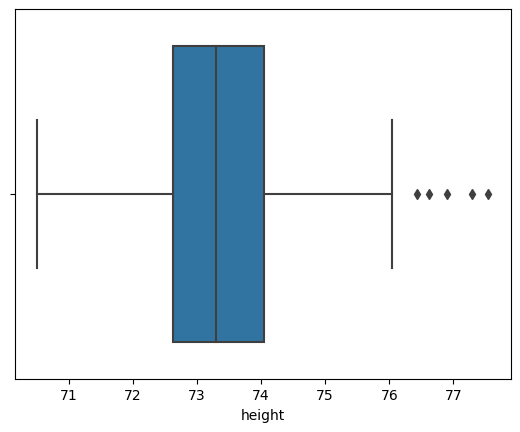

In [ ]:
sns.boxplot(x=df['height'])

<AxesSubplot: xlabel='error'>

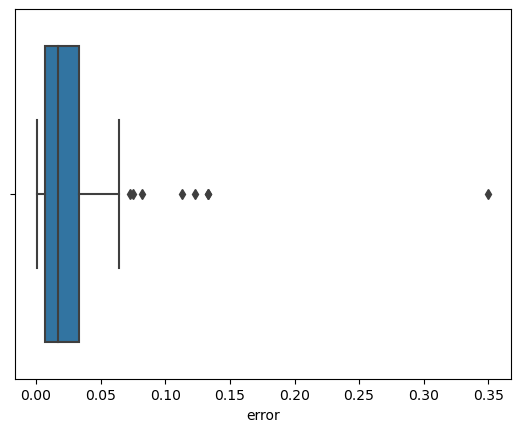

In [ ]:
sns.boxplot(x=df['error'])

In [ ]:
#create a function to find outliers using IQR
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [ ]:
outliers = find_outliers_IQR(df)
print("max outlier value:\n"+ str(outliers.max()))
print("********************************************")
print("min outlier value:\n"+ str(outliers.min()))

max outlier value:
height    77.546
error      0.350
dtype: float64
********************************************
min outlier value:
height    76.435
error      0.073
dtype: float64


In [ ]:
X_columns = df.columns
for col in X_columns:  
  q1, q2, q3 = np.percentile(df[col], 25), np.percentile(df[col], 50), np.percentile(df[col], 75)
  IQR = q3 - q1
  upper_limit = q3 + (1.5 * IQR)
  lower_limit = q1 - (1.5 * IQR)
  df.loc[df[col]< lower_limit, col] = q2
  df.loc[df[col]> upper_limit, col] = q2 

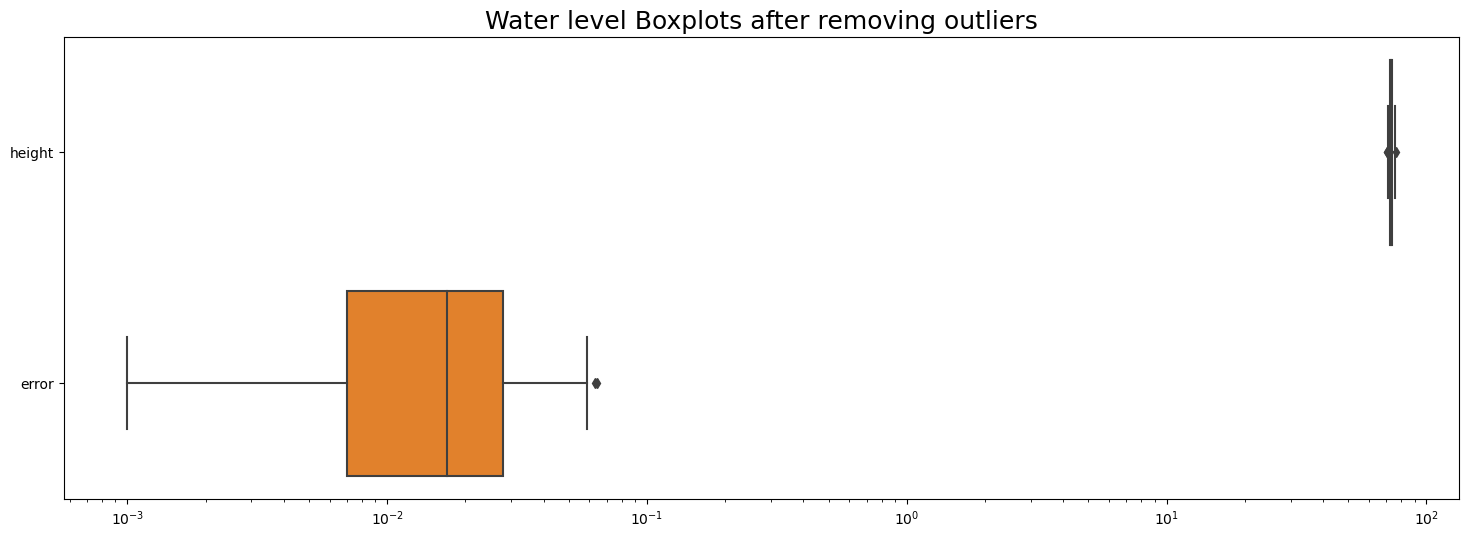

In [ ]:

plt.figure(figsize = (18,6))
ax =sns.boxplot(data = df, orient="h")
ax.set_title('Water level Boxplots after removing outliers', fontsize = 18)
ax.set(xscale="log")
plt.show()